## HOME LOAN DATASET

### Phase One: Data collection and preparation

In [2]:
# import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [3]:
# Data injestion of the train dataset
loan_train_data = pd.read_csv('home_loan_train.csv')
print("First two rows of the dataset\n")
loan_train_data.head(2)

First two rows of the dataset



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


**Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.**

In [4]:
# Checking for duplicates

print(f"Total number of duplicated values \n {loan_train_data.duplicated().sum()}")

Total number of duplicated values 
 0


In [5]:
# Checking for inconsistencies in the dataset
loan_train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
# Printing the columns in the dataset
loan_train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# Check the basic information of the dataset
loan_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Checking for missing values
loan_train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Checking the shape of the dataset
loan_train_data.shape

(614, 13)

In [10]:
# Setting the loan ID as the ID
loan_train_data.set_index("Loan_ID", inplace=True)

In [11]:
# Display the output
loan_train_data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


**Task 1.3: Clean the dataset by handling missing values, correcting data types, and addressing outliers.**

**Handling the categorical missing data**

In [12]:
# Making a copy of our dataset
df_train = loan_train_data.copy()

In [13]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
# Get the missing coluumns
missing_cols = [x for x in df_train.columns if df_train[x].isna().any() == True]

In [15]:
# Extract the columns with categorical variables
num_missing_cols = [x for x in missing_cols if df_train[x].dtype in ["int64","float64"]]

cat_missing_cols = [x for x in missing_cols if x not in num_missing_cols]
num_missing_cols .remove('Loan_Amount_Term')
# num_missing_cols .remove('Credit_History')
cat_missing_cols.append('Loan_Amount_Term')
# cat_missing_cols.append('Credit_History')


In [16]:
# Display the columns
print(num_missing_cols )
print(cat_missing_cols)

['LoanAmount', 'Credit_History']
['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']


In [17]:
# Fill the the missing categorical dataset with the mode from each column
for col in cat_missing_cols:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])

# Check the missing values again
df_train[cat_missing_cols].isna().sum()

Gender              0
Married             0
Dependents          0
Self_Employed       0
Loan_Amount_Term    0
dtype: int64

In [18]:
# Checking the categorical columns for the distribution
for col in cat_missing_cols:
    print(col)
    print(df_train[col].value_counts())

Gender
Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
Self_Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


**Handling missing data in the numerical columns**

In [19]:
# Filling the the missing numerical dataset with the mode from each column
for col in num_missing_cols:
    missing_num_values_mode = df_train[col].median()
    df_train[col].fillna(missing_num_values_mode, inplace=True)
    print(f"Fill the missing dataset in the {col} with the value of the {missing_num_values_mode}")

Fill the missing dataset in the LoanAmount with the value of the 128.0
Fill the missing dataset in the Credit_History with the value of the 1.0


C:\Users\kanyi\AppData\Local\Temp\ipykernel_33664\2308569681.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(missing_num_values_mode, inplace=True)
C:\Users\kanyi\AppData\Local\Temp\ipykernel_33664\2308569681.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [20]:
# Checking the categorical columns for the distribution
for col in num_missing_cols:
    print(col)
    print(df_train[col].value_counts())

LoanAmount
LoanAmount
128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
292.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 203, dtype: int64
Credit_History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


In [21]:
# Confirm the missing cat columns
df_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
# Categorical columns
cat_cols = [x for x in df_train.columns if df_train[x].dtype not in ["int64", "float64"]]
cat_cols.append("Loan_Amount_Term")


In [23]:
# Extract the columns with numerical values
num_col = [x for x in df_train.columns if x not in cat_cols]

In [24]:
# Checking the distribution of the numerical columns
for col in num_col:
    print(col)
    print(df_train[col].sum())

ApplicantIncome
3317724
CoapplicantIncome
995444.9199886399
LoanAmount
89492.0
Credit_History
525.0


**Locating Outliers**

<Axes: ylabel='LoanAmount'>

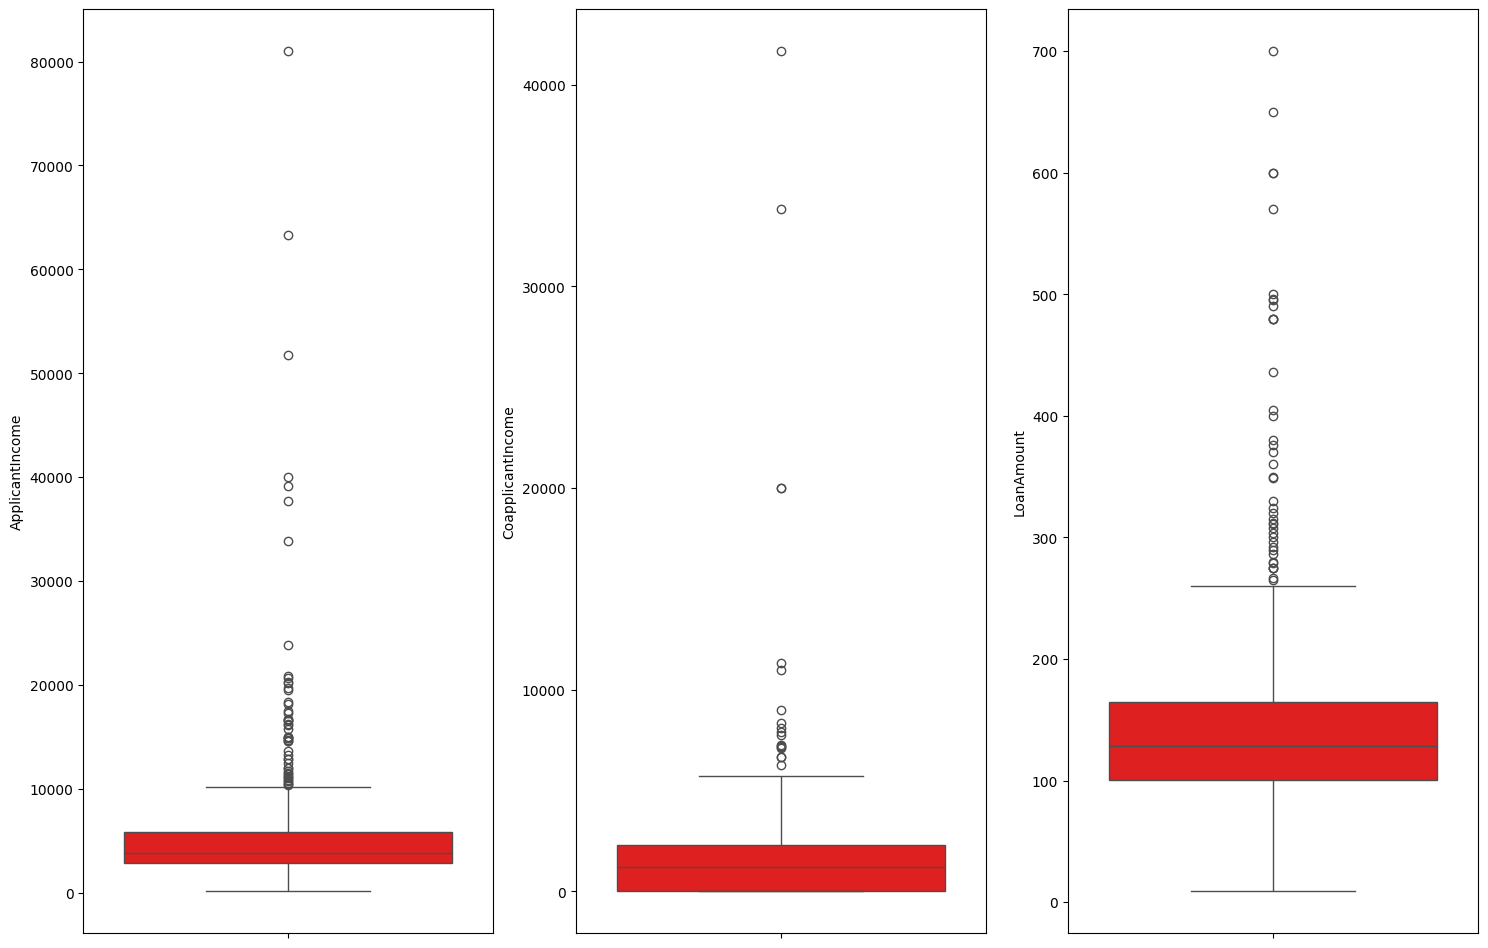

In [25]:
# Checking for outliers using boxplot

figure, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 12))
sns.boxplot(df_train[num_col[0]], ax= axes[0], color="red")
sns.boxplot(df_train[num_col[1]], ax = axes[1], color="red")
sns.boxplot(df_train[num_col[2]], ax = axes[2], color="red")



**Data Cleaning**

In [26]:
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [27]:
# Checking the values in the Dependents columns
df_train["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [28]:
# Cleaning the dataset to remove the "+" in the Dependents columns
df_train["Dependents"] = df_train["Dependents"].str.replace("+", "", regex=False)


In [29]:
# Checking the datatype of the Dependents column
df_train["Dependents"].dtypes

dtype('O')

In [30]:
# Converting the type of the Dependent column to int64
df_train["Dependents"] = df_train["Dependents"].astype(int)
df_train["Dependents"].dtypes

dtype('int64')

In [31]:
# Convert the loan status to numeric
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N':0})


In [32]:
# Display the output
df_train['Loan_Status']

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int64

In [33]:
# Print output
df_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [34]:
df_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
df_train.to_csv('cleaned_home_data.csv', index=False)